# NR Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import sys
import random as rd
# import torch
# from torch import nn, optim
# import torch.nn.functional as F
# import torch.utils.data as tud
# from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# import CustomDataset as cd

### In Tensorflow

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

2022-09-01 09:00:58.637547: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
C130_dat, F170_dat = np.load('data_old/C_130keV_10000.npy'), np.load('data_old/F_170keV_10000.npy')

In [4]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C130_dat)):
    data.append(C130_dat[i])
    labels.append([1,0])
    Csum.append(np.sum(C130_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append([0,1])
    Fsum.append(np.sum(F170_dat[i]))

In [5]:
data -= np.mean(data)
data/=np.std(data)

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [7]:
# train_data, train_labels = [],[]
# test_data, test_labels = [],[]
# Csum, Fsum = [],[]

# n_train = int(len(C130_dat) * 0.8)

# for i in range(n_train):
#     train_data.append(C130_dat[i])
#     train_labels.append([1,0])
#     Csum.append(np.sum(C130_dat[i]))

# for i in range(n_train):
#     train_data.append(F170_dat[i])
#     train_labels.append([0,1])
#     Fsum.append(np.sum(F170_dat[i]))

# for i in range(n_train, len(C130_dat)):
#     test_data.append(C130_dat[i])
#     test_labels.append([1,0])
#     Csum.append(np.sum(C130_dat[i]))

# for i in range(n_train, len(F170_dat)):
#     test_data.append(F170_dat[i])
#     test_labels.append([0,1])
#     Fsum.append(np.sum(F170_dat[i]))


# # Maximum values

# C130_max = np.amax(np.amax(C130_dat, axis=(1,2)))
# F170_max = np.amax(np.amax(F170_dat, axis=(1,2)))
# all_max = max(C130_max, F170_max)


# # Normalise to (0,1)

# train_data = np.array(train_data) / all_max
# train_labels = np.array(train_labels)
# test_data = np.array(test_data) / all_max
# test_labels = np.array(test_labels)

# # Shuffle Data

# train_data, train_labels = shuffle(train_data, train_labels)
# test_data, test_labels = shuffle(test_data, test_labels)

In [8]:
# tot_data=[]
# for i in range(len(train_data)):
#     tot_data.append(train_data[i])
# for i in range(len(test_data)):
#     tot_data.append(test_data[i])

In [9]:
# train_data -= np.mean(train_data)
# train_data/=np.std(train_data)

# test_data -= np.mean(test_data)
# test_data/=np.std(test_data)

In [10]:
np.mean(test_data)

2.8451436103516313e-07

In [11]:
print(np.shape(train_data))
print(np.shape(test_data))
print(np.shape(train_labels))
print(np.shape(test_labels))

(14000, 97, 97)
(6000, 97, 97)
(14000, 2)
(6000, 2)


In [12]:
dat_sum = [np.sum(test_data[i]) for i in range(len(test_data))]

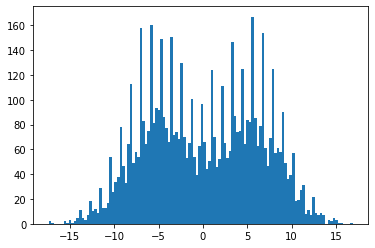

In [13]:
plt.hist(dat_sum,bins=120);

We have 10,000 1s and 10,000 0s.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout


def nr_model():
    nr_model = Sequential([
        Conv2D(1, kernel_size=(3,3), input_shape=(97,97,1), activation='relu', padding='same'),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(2, activation='softmax')
    ], name='nr_model')
    return nr_model


model = nr_model()

2022-08-31 11:30:55.968657: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-31 11:30:55.970044: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-31 11:30:56.453689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 11:30:56.453972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:03.0 name: Quadro RTX 4000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 387.49GiB/s
2022-08-31 11:30:56.454015: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-08-31 11:30:56.457880: I tensorflow/stream_executor/platform/default/ds

In [15]:
model.summary()

Model: "nr_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 1)         10        
_________________________________________________________________
flatten (Flatten)            (None, 9409)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9635840   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 9,637,900
Trainable params: 9,637,900
Non-trainable params: 0
_________________________________________________________________


In [16]:
#loading the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
train_dataset.element_spec

#printing relevant properties
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97)
(2,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97)
(2,)


In [17]:
#batching the datasets
batch_size = 34
train_dataset = train_dataset.batch(batch_size)  # drop_remainder=True
test_dataset = test_dataset.batch(batch_size)

In [ ]:
#compiling and fitting the model
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=sgd, loss=loss_fn, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

In [ ]:
#plotting loss function and accuracy for training and test sets over all epochs
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(history.history['loss']),ax1.plot(history.history['val_loss'])
ax1.set_title('Convolutional Neural Network Loss over 20 Epochs')
ax1.set_ylabel('Loss'),ax1.set_xlabel('Epoch'),ax1.legend(['Training Set', 'Test Set'], loc='best');
ax2.plot(history.history['accuracy']),ax2.plot(history.history['val_accuracy'])
ax2.set_title('Convolutional Neural Network Accuracy over 20 Epochs')
ax2.set_ylabel('Accuracy'),ax2.set_xlabel('Epoch'),ax2.legend(['Training Set', 'Test Set'], loc='best');

In [ ]:
image = train_data[43]

#initial plotting of chosen image
plt.figure(figsize=(6, 10))
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.models import Model

#Model and model are different
#getting model inputs, layer names, outputs for visualisation
inputs = model.inputs
layer_names = [layer.name for layer in model.layers]
outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
#creating model for extracting features
model_features = Model(inputs=inputs, outputs=outputs)

In [ ]:
#re-shaping image and passing through new model to output features
input = image.reshape((1,) + image.shape)
features = model_features.predict(input)

In [ ]:
conv_features = features[0]

In [ ]:
#plotting features from convolutional layers, along with layer names
fig, axs = plt.subplots(1,4, figsize=(18,5))
fig.subplots_adjust(top=1)
fig.suptitle('Visualisation of feature map 1')
axs[0].imshow(image, cmap='Greys',label='input')
for i in range(len(conv_features)):
    feature_map = conv_features[i]
    axs[i+1].imshow(feature_map[0, ..., 1],cmap='Greys')
    axs[i+1].set_title(layer_names[i]);

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

### Linear Model

In [18]:
#loading the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
train_dataset.element_spec

#printing relevant properties
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97)
(2,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97)
(2,)


In [19]:
#batching the datasets
batch_size = 34
train_dataset = train_dataset.batch(batch_size)  # drop_remainder=True
test_dataset = test_dataset.batch(batch_size)

In [20]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout

def lin_model():
    lin_model = Sequential([
        Flatten(input_shape=(97,97,1)),
        Dense(2, activation='softmax')
    ], name='lin_model')
    return lin_model

model = lin_model()

In [21]:
model.summary()

Model: "lin_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 9409)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18820     
Total params: 18,820
Trainable params: 18,820
Non-trainable params: 0
_________________________________________________________________


In [22]:
#compiling and fitting the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=250, validation_data=test_dataset)

Epoch 1/250


2022-08-31 11:30:59.798025: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-31 11:30:59.800507: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099995000 Hz
2022-08-31 11:30:59.833800: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


412/412 [==============================] - 3s 6ms/step - loss: 0.8640 - accuracy: 0.5232 - val_loss: 0.8203 - val_accuracy: 0.5413
Epoch 2/250
412/412 [==============================] - 2s 4ms/step - loss: 0.7460 - accuracy: 0.5629 - val_loss: 0.8062 - val_accuracy: 0.5577
Epoch 3/250
412/412 [==============================] - 2s 4ms/step - loss: 0.7192 - accuracy: 0.5889 - val_loss: 0.7945 - val_accuracy: 0.5718
Epoch 4/250
412/412 [==============================] - 2s 4ms/step - loss: 0.6981 - accuracy: 0.6058 - val_loss: 0.7829 - val_accuracy: 0.5852
Epoch 5/250
412/412 [==============================] - 2s 4ms/step - loss: 0.6792 - accuracy: 0.6174 - val_loss: 0.7711 - val_accuracy: 0.5950
Epoch 6/250
412/412 [==============================] - 2s 4ms/step - loss: 0.6619 - accuracy: 0.6281 - val_loss: 0.7593 - val_accuracy: 0.6048
Epoch 7/250
412/412 [==============================] - 2s 4ms/step - loss: 0.6455 - accuracy: 0.6379 - val_loss: 0.7476 - val_accuracy: 0.6157
Epoch 8/250

412/412 [==============================] - 2s 4ms/step - loss: 0.3008 - accuracy: 0.8784 - val_loss: 0.4431 - val_accuracy: 0.8373
Epoch 59/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2983 - accuracy: 0.8800 - val_loss: 0.4409 - val_accuracy: 0.8390
Epoch 60/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2960 - accuracy: 0.8805 - val_loss: 0.4388 - val_accuracy: 0.8397
Epoch 61/250
412/412 [==============================] - 2s 5ms/step - loss: 0.2937 - accuracy: 0.8813 - val_loss: 0.4367 - val_accuracy: 0.8410
Epoch 62/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2914 - accuracy: 0.8825 - val_loss: 0.4346 - val_accuracy: 0.8415
Epoch 63/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2893 - accuracy: 0.8835 - val_loss: 0.4327 - val_accuracy: 0.8418
Epoch 64/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.8841 - val_loss: 0.4308 - val_accuracy: 0.8427
Epoch

Epoch 115/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2251 - accuracy: 0.9114 - val_loss: 0.3835 - val_accuracy: 0.8708
Epoch 116/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2244 - accuracy: 0.9116 - val_loss: 0.3830 - val_accuracy: 0.8715
Epoch 117/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2237 - accuracy: 0.9116 - val_loss: 0.3826 - val_accuracy: 0.8722
Epoch 118/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2230 - accuracy: 0.9117 - val_loss: 0.3821 - val_accuracy: 0.8725
Epoch 119/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2223 - accuracy: 0.9119 - val_loss: 0.3817 - val_accuracy: 0.8732
Epoch 120/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2217 - accuracy: 0.9134 - val_loss: 0.3813 - val_accuracy: 0.8732
Epoch 121/250
412/412 [==============================] - 2s 4ms/step - loss: 0.2210 - accuracy: 0.9142 - val_loss: 0.3809 - val_ac

412/412 [==============================] - 2s 4ms/step - loss: 0.1840 - accuracy: 0.9260 - val_loss: 0.3688 - val_accuracy: 0.8970
Epoch 228/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1839 - accuracy: 0.9260 - val_loss: 0.3689 - val_accuracy: 0.8972
Epoch 229/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1837 - accuracy: 0.9259 - val_loss: 0.3690 - val_accuracy: 0.8972
Epoch 230/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1835 - accuracy: 0.9261 - val_loss: 0.3691 - val_accuracy: 0.8972
Epoch 231/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1833 - accuracy: 0.9261 - val_loss: 0.3693 - val_accuracy: 0.8970
Epoch 232/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1832 - accuracy: 0.9261 - val_loss: 0.3694 - val_accuracy: 0.8972
Epoch 233/250
412/412 [==============================] - 2s 4ms/step - loss: 0.1830 - accuracy: 0.9262 - val_loss: 0.3695 - val_accuracy: 0.8972

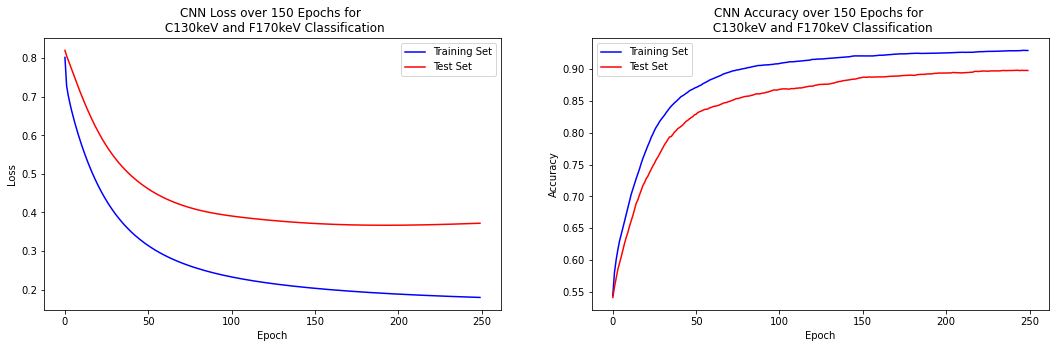

In [30]:
#plotting loss function and accuracy for training and test sets over all epochs
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.plot(history.history['loss'],c='b'),ax1.plot(history.history['val_loss'],c='r')
ax1.set_title('CNN Loss over 150 Epochs for \n C130keV and F170keV Classification')
ax1.set_ylabel('Loss'),ax1.set_xlabel('Epoch'),ax1.legend(['Training Set', 'Test Set'], loc='best');
ax2.plot(history.history['accuracy'],c='b'),ax2.plot(history.history['val_accuracy'],c='r')
ax2.set_title('CNN Accuracy over 150 Epochs for \n C130keV and F170keV Classification')
ax2.set_ylabel('Accuracy'),ax2.set_xlabel('Epoch'),ax2.legend(['Training Set', 'Test Set'], loc='best');

In [31]:
np.save('Figure_Data/fig1_acc1.npy', history.history['accuracy'])
np.save('Figure_Data/fig1_valacc1.npy', history.history['val_accuracy'])

In [25]:
print(model.layers[1].weights)
print(model.layers[1].bias.numpy())
print(model.layers[1].bias_initializer)

[<tf.Variable 'dense_2/kernel:0' shape=(9409, 2) dtype=float32, numpy=
array([[-0.35055187,  0.35074154],
       [-0.36183766,  0.36403218],
       [-0.32976142,  0.34616092],
       ...,
       [-0.32295737,  0.33877525],
       [-0.35256788,  0.36782888],
       [-0.35011622,  0.3332486 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.3452362, -0.345236 ], dtype=float32)>]
[ 0.3452362 -0.345236 ]


In [26]:
weights_arr = model.layers[1].weights[0]

In [27]:
weights_array = weights_arr.numpy()

In [28]:
weights_array.shape

(9409, 2)

In [29]:
print(np.max(weights_array[0]))
print(np.min(weights_array[0]))
print(np.mean(weights_array[0]))
print(np.std(weights_array[0]))

0.35074154
-0.35055187
9.483099e-05
0.3506467


Low standard deviation, as we would expect.

## Setting Intensities as Equal

In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [42]:
C130_dat, F170_dat = np.load('data_old/C_130keV_10000.npy'), np.load('data_old/F_170keV_10000.npy')

In [43]:
C130_dat -= np.mean(C130_dat) # the -= means can be read as x = x- np.mean(x)
C130_dat/=np.std(C130_dat)

F170_dat -= np.mean(F170_dat) # the -= means can be read as x = x- np.mean(x)
F170_dat/=np.std(F170_dat)

In [44]:
train_data, train_labels = [],[]
test_data, test_labels = [],[]
Csum, Fsum = [],[]

n_train = int(len(C130_dat) * 0.8)

for i in range(n_train):
    train_data.append(C130_dat[i])
    train_labels.append([1,0])
    Csum.append(np.sum(C130_dat[i]))

for i in range(n_train):
    train_data.append(F170_dat[i])
    train_labels.append([0,1])
    Fsum.append(np.sum(F170_dat[i]))

for i in range(n_train, len(C130_dat)):
    test_data.append(C130_dat[i])
    test_labels.append([1,0])
    Csum.append(np.sum(C130_dat[i]))

for i in range(n_train, len(F170_dat)):
    test_data.append(F170_dat[i])
    test_labels.append([0,1])
    Fsum.append(np.sum(F170_dat[i]))


# Maximum values

C130_max = np.amax(np.amax(C130_dat, axis=(1,2)))
F170_max = np.amax(np.amax(F170_dat, axis=(1,2)))
all_max = max(C130_max, F170_max)


# Normalise to (0,1)

train_data = np.array(train_data) / all_max
train_labels = np.array(train_labels)
test_data = np.array(test_data) / all_max
test_labels = np.array(test_labels)

# Shuffle Data

train_data, train_labels = shuffle(train_data, train_labels)
test_data, test_labels = shuffle(test_data, test_labels)


Accuracy Possible with Cut of 0 on Total Intensity: 51.345%


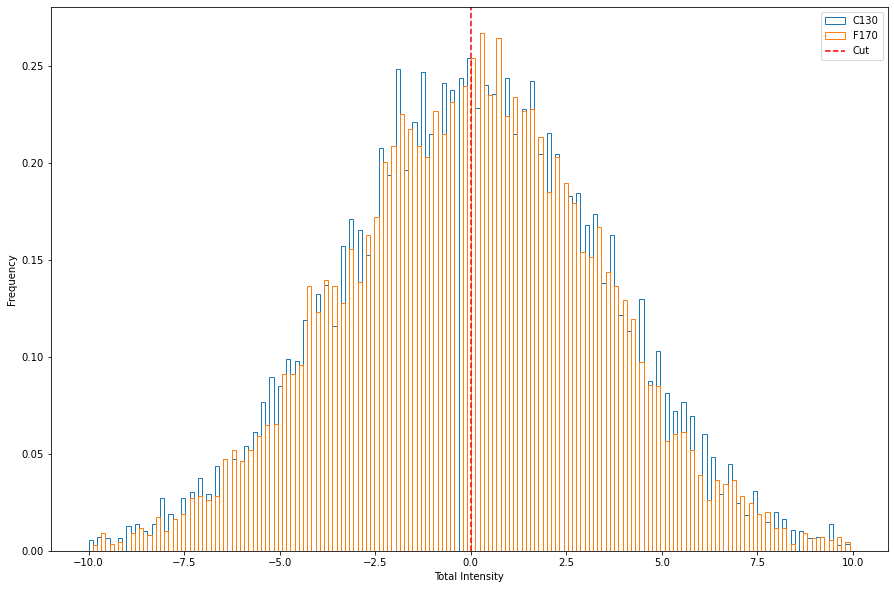

In [45]:
cut = 0
Cless, Fgrt = [],[]
for i in range(len(Fsum)):
    if Fsum[i] > cut:
        Fgrt.append(Fsum[i])
    if Csum[i] <= cut:
        Cless.append(Csum[i])

plt.figure(figsize=(15,10))
plt.hist(Csum, density=True, histtype='step', bins=np.arange(-10,10,0.11), label='C130')  # density=False would make counts
plt.hist(Fsum, density=True, histtype='step', bins=np.arange(-10,10,0.11), label='F170')
plt.axvline(cut, c='r', ls='--', label='Cut')
plt.ylabel('Frequency')
plt.xlabel('Total Intensity')
plt.legend()
plt.savefig('intensity_hist.png')

Acc = (len(Fgrt)+len(Cless))/(len(Fsum)+len(Csum))*100
print('\nAccuracy Possible with Cut of {} on Total Intensity: {}%'.format(cut,Acc))

angle
dE/dx
(Length and intensity)
probability of secondary recoil (different for different energies)


Before histogram of electrons at gem
clipping for flourine vs carbon - maybe why overfitting?


Explain what each node is - it's not that each node represents 'whether it's orange' - it represents some value and the combination of the values of all nodes means its an orange.

In [46]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout


# def nr_model():
#     nr_model = Sequential([
#         Conv2D(8, kernel_size=(3,3), input_shape=(97,97,1)),
#         LeakyReLU(alpha=0.01),
#         Conv2D(8, kernel_size=(3,3)),
#         LeakyReLU(alpha=0.01),
#         Flatten(),
#         Dense(2, activation='softmax')
#     ], name='nr_model')
#     return nr_model


# model = nr_model()

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout


def nr_model():
    nr_model = Sequential([
        Conv2D(4, kernel_size=(3,3), input_shape=(97,97,1)),
        LeakyReLU(alpha=0.01),
        Conv2D(8, kernel_size=(3,3)),
        LeakyReLU(alpha=0.01),
        Flatten(),
        Dense(2, activation='softmax')
    ], name='nr_model')
    return nr_model


model = nr_model()

In [48]:
np.shape(test_labels)

(4000, 2)

In [49]:
np.shape(train_labels)

(16000, 2)

In [50]:
np.shape(train_data)

(16000, 97, 97)

In [51]:
np.shape(np.expand_dims(train_data, axis=-1))

(16000, 97, 97, 1)

In [52]:
model.summary()

Model: "nr_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 95, 95, 4)         40        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 95, 95, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 8)         296       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 93, 93, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 69192)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 138386    
Total params: 138,722
Trainable params: 138,722
Non-trainable params: 0
____________________________________________________

In [53]:
#loading the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((np.expand_dims(train_data, axis=-1), train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((np.expand_dims(test_data, axis=-1), test_labels))
train_dataset.element_spec

#printing relevant properties
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97, 1)
(2,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97, 1)
(2,)


In [54]:
#batching the datasets
batch_size = 50
train_dataset = train_dataset.batch(batch_size)  # drop_remainder=True
test_dataset = test_dataset.batch(batch_size)

In [55]:
#compiling and fitting the model
sgd = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=sgd, loss=loss_fn, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=120, validation_data=test_dataset)

Epoch 1/120
320/320 [==============================] - 3s 8ms/step - loss: 0.6879 - accuracy: 0.5452 - val_loss: 0.6757 - val_accuracy: 0.5778
Epoch 2/120
320/320 [==============================] - 2s 8ms/step - loss: 0.6770 - accuracy: 0.5775 - val_loss: 0.6715 - val_accuracy: 0.5825
Epoch 3/120
320/320 [==============================] - 2s 7ms/step - loss: 0.6671 - accuracy: 0.5917 - val_loss: 0.6732 - val_accuracy: 0.5885
Epoch 4/120
320/320 [==============================] - 2s 7ms/step - loss: 0.6564 - accuracy: 0.6054 - val_loss: 0.6709 - val_accuracy: 0.5915
Epoch 5/120
320/320 [==============================] - 2s 7ms/step - loss: 0.6464 - accuracy: 0.6214 - val_loss: 0.6702 - val_accuracy: 0.5838
Epoch 6/120
320/320 [==============================] - 2s 7ms/step - loss: 0.6401 - accuracy: 0.6318 - val_loss: 0.6595 - val_accuracy: 0.5985
Epoch 7/120
320/320 [==============================] - 2s 7ms/step - loss: 0.6261 - accuracy: 0.6401 - val_loss: 0.6534 - val_accuracy: 0.6102

Epoch 58/120
320/320 [==============================] - 2s 7ms/step - loss: 0.1324 - accuracy: 0.9742 - val_loss: 0.1973 - val_accuracy: 0.9408
Epoch 59/120
320/320 [==============================] - 2s 7ms/step - loss: 0.1209 - accuracy: 0.9773 - val_loss: 0.1895 - val_accuracy: 0.9433
Epoch 60/120
320/320 [==============================] - 2s 7ms/step - loss: 0.1122 - accuracy: 0.9797 - val_loss: 0.1912 - val_accuracy: 0.9373
Epoch 61/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0996 - accuracy: 0.9846 - val_loss: 0.1792 - val_accuracy: 0.9430
Epoch 62/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0958 - accuracy: 0.9851 - val_loss: 0.1729 - val_accuracy: 0.9460
Epoch 63/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0924 - accuracy: 0.9850 - val_loss: 0.1725 - val_accuracy: 0.9445
Epoch 64/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0945 - accuracy: 0.9820 - val_loss: 0.1552 - val_accuracy:

Epoch 115/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0959 - accuracy: 0.9687 - val_loss: 0.1925 - val_accuracy: 0.9283
Epoch 116/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0763 - accuracy: 0.9778 - val_loss: 0.1887 - val_accuracy: 0.9305
Epoch 117/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0693 - accuracy: 0.9823 - val_loss: 0.1937 - val_accuracy: 0.9285
Epoch 118/120
320/320 [==============================] - 2s 8ms/step - loss: 0.0621 - accuracy: 0.9861 - val_loss: 0.2000 - val_accuracy: 0.9285
Epoch 119/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0554 - accuracy: 0.9887 - val_loss: 0.2043 - val_accuracy: 0.9250
Epoch 120/120
320/320 [==============================] - 2s 7ms/step - loss: 0.0491 - accuracy: 0.9919 - val_loss: 0.2011 - val_accuracy: 0.9247


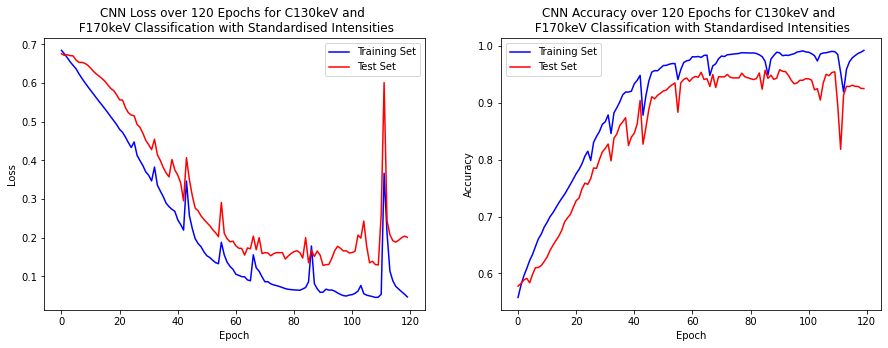

In [56]:
#plotting loss function and accuracy for training and test sets over all epochs
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(history.history['loss'],c='b'),ax1.plot(history.history['val_loss'],c='r')
ax1.set_title('CNN Loss over 120 Epochs for C130keV and \n F170keV Classification with Standardised Intensities')
ax1.set_ylabel('Loss'),ax1.set_xlabel('Epoch'),ax1.legend(['Training Set', 'Test Set'], loc='best');
ax2.plot(history.history['accuracy'],c='b'),ax2.plot(history.history['val_accuracy'],c='r')
ax2.set_title('CNN Accuracy over 120 Epochs for C130keV and \n F170keV Classification with Standardised Intensities')
ax2.set_ylabel('Accuracy'),ax2.set_xlabel('Epoch'),ax2.legend(['Training Set', 'Test Set'], loc='best');

In [57]:
np.save('Figure_Data/fig1_acc2.npy', history.history['accuracy'])
np.save('Figure_Data/fig1_valacc2.npy', history.history['val_accuracy'])

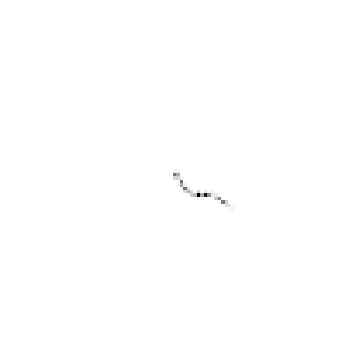

In [58]:
image = train_data[43]

#initial plotting of chosen image
plt.figure(figsize=(6, 10))
plt.imshow(image,cmap='Greys')
plt.axis('off')
plt.show()

In [68]:
from tensorflow.keras.models import Model

#Model and model are different
#getting model inputs, layer names, outputs for visualisation
inputs = model.inputs
layer_names = [layer.name for layer in model.layers]
outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
#creating model for extracting features
model_features = Model(inputs=inputs, outputs=outputs)

In [69]:
#testing model_features
model_features.inputs
model_features.outputs;

In [70]:
#re-shaping image and passing through new model to output features
input = image.reshape((1,) + image.shape)
features = model_features.predict(input)

In [71]:
#the length of features should match the number of layers
len(features)

6

In [72]:
#printing all layers from CNN
for layer_name, feature_map in zip(layer_names, features):
    print(f"The shape of the {layer_name} is: {feature_map.shape}")

The shape of the conv2d_2 is: (1, 95, 95, 4)
The shape of the leaky_re_lu_2 is: (1, 95, 95, 4)
The shape of the conv2d_3 is: (1, 93, 93, 8)
The shape of the leaky_re_lu_3 is: (1, 93, 93, 8)
The shape of the flatten_1 is: (1, 69192)
The shape of the dense_1 is: (1, 2)


In [73]:
#selecting features from convolutional layers
conv_features = features[0], features[2]

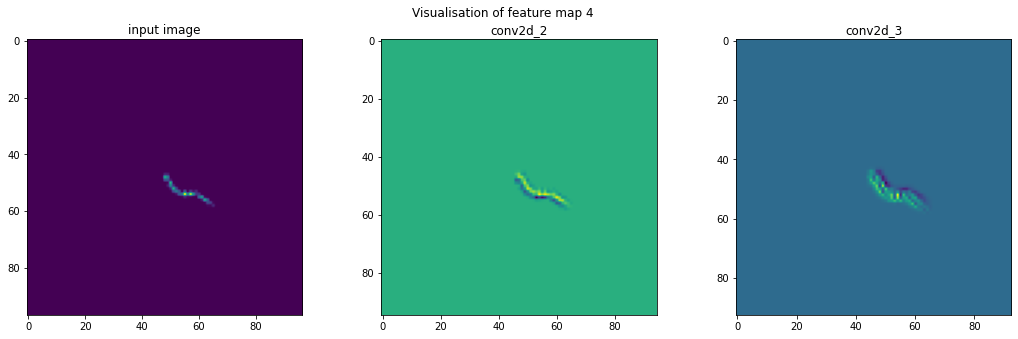

In [74]:
#plotting features from convolutional layers, along with layer names
fig, axs = plt.subplots(1,3, figsize=(18,5))
fig.subplots_adjust(top=0.89)
fig.suptitle('Visualisation of feature map 4')
axs[0].imshow(image)
axs[0].set_title('input image')
for i in range(len(conv_features)):
      feature_map = conv_features[i]
      axs[i+1].imshow(feature_map[0, ..., 3])
      axs[i+1].set_title(layer_names[i*2]);

In [87]:
len(conv_features[0])

1

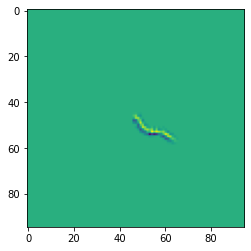

In [92]:
plt.imshow(conv_features[0][0, ..., 3])

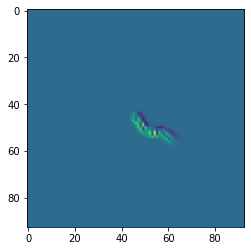

In [93]:
plt.imshow(conv_features[1][0, ..., 3])

In [94]:
np.save('Figure_Data/fig0_img.npy', image)
np.save('Figure_Data/fig0_featuremap1.npy', conv_features[0])
np.save('Figure_Data/fig0_featuremap2.npy', conv_features[1])

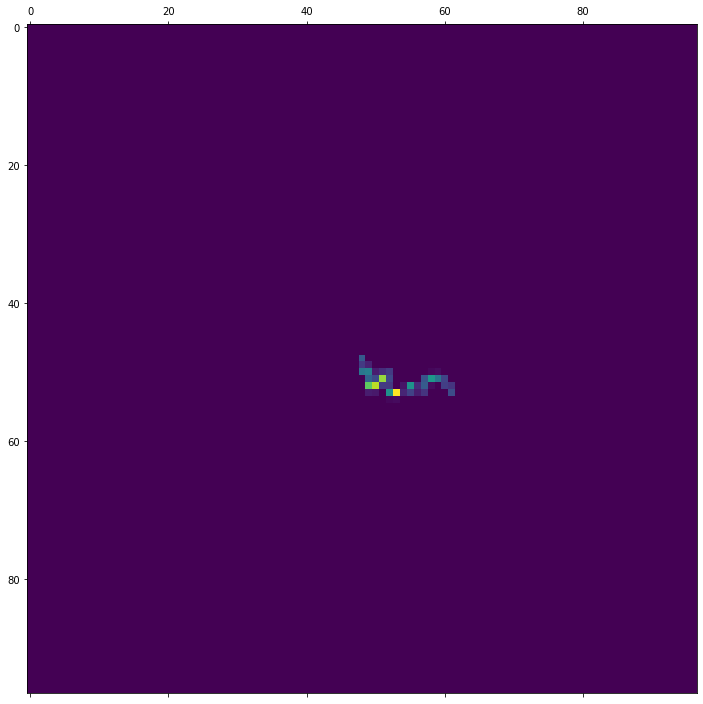

In [66]:
plt.figure(figsize=(12,12))
plt.matshow(F170_dat[135],fignum=1);

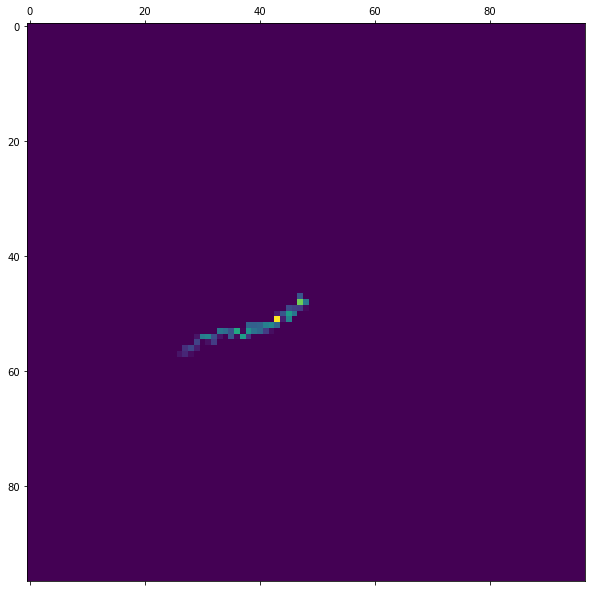

In [67]:
plt.figure(figsize=(10,10))
plt.matshow(F170_dat[17],fignum=1);

## Doing both same energy again

In [77]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [78]:
C170_dat, F170_dat = np.load('data_old/C_170keV.npy'), np.load('data_old/F_170keV.npy')

In [79]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C170_dat)):
    data.append(C170_dat[i])
    labels.append([1,0])
    Csum.append(np.sum(C170_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append([0,1])
    Fsum.append(np.sum(F170_dat[i]))

In [80]:
data -= np.mean(data)
data/=np.std(data)

In [81]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout


def nr_model():
    nr_model = Sequential([
        Conv2D(2, kernel_size=(3,3), input_shape=(97,97,1), activation='relu'),
        Flatten(),
        Dense(2, activation='softmax')
    ], name='nr_model')
    return nr_model


model = nr_model()

In [83]:
model.summary()

Model: "nr_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 95, 95, 2)         20        
_________________________________________________________________
flatten_5 (Flatten)          (None, 18050)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 36102     
Total params: 36,122
Trainable params: 36,122
Non-trainable params: 0
_________________________________________________________________


In [84]:
#loading the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((np.expand_dims(train_data, axis=-1), train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((np.expand_dims(test_data, axis=-1), test_labels))
train_dataset.element_spec

#printing relevant properties
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97, 1)
(2,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(97, 97, 1)
(2,)


In [85]:
#batching the datasets
batch_size = 50
train_dataset = train_dataset.batch(batch_size)  # drop_remainder=True
test_dataset = test_dataset.batch(batch_size)

In [86]:
#compiling and fitting the model
sgd = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=sgd, loss=loss_fn, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=40, validation_data=test_dataset)

Epoch 1/40
140/140 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.6093 - val_loss: 0.5616 - val_accuracy: 0.6960
Epoch 2/40
140/140 [==============================] - 1s 6ms/step - loss: 0.5013 - accuracy: 0.7328 - val_loss: 0.4711 - val_accuracy: 0.7733
Epoch 3/40
140/140 [==============================] - 1s 6ms/step - loss: 0.3500 - accuracy: 0.8622 - val_loss: 0.2149 - val_accuracy: 0.9547
Epoch 4/40
140/140 [==============================] - 1s 6ms/step - loss: 0.1362 - accuracy: 0.9831 - val_loss: 0.0832 - val_accuracy: 0.9937
Epoch 5/40
140/140 [==============================] - 1s 6ms/step - loss: 0.0487 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9977
Epoch 6/40
140/140 [==============================] - 1s 6ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 0.9987
Epoch 7/40
140/140 [==============================] - 1s 6ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9990
Epoch 

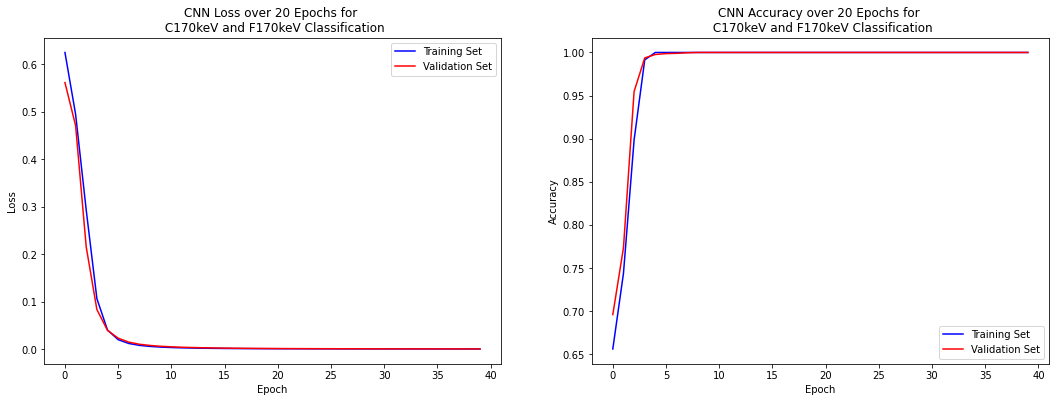

In [87]:
#plotting loss function and accuracy for training and test sets over all epochs
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(history.history['loss'],c='b'),ax1.plot(history.history['val_loss'],c='r')
ax1.set_title('CNN Loss over 20 Epochs for \n C170keV and F170keV Classification')
ax1.set_ylabel('Loss'),ax1.set_xlabel('Epoch'),ax1.legend(['Training Set', 'Validation Set'], loc='best');
ax2.plot(history.history['accuracy'],c='b'),ax2.plot(history.history['val_accuracy'],c='r')
ax2.set_title('CNN Accuracy over 20 Epochs for \n C170keV and F170keV Classification')
ax2.set_ylabel('Accuracy'),ax2.set_xlabel('Epoch'),ax2.legend(['Training Set', 'Validation Set'], loc='best');

In [88]:
np.save('Figure_Data/fig1_acc3.npy', history.history['accuracy'])
np.save('Figure_Data/fig1_valacc3.npy', history.history['val_accuracy'])

In [ ]:
plt.figure(figsize=(10,10))
plt.matshow(F170_dat[20],fignum=1);

In [ ]:
plt.figure(figsize=(10,10))
plt.matshow(C170_dat[17],fignum=1);

# New Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import sys
import random as rd
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as tud
# from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import CustomDataset as cd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [ ]:
C130_dat, F170_dat = np.load('data/C_130keV_1.npy'), np.load('data/F_170keV_1.npy')

In [ ]:
np.shape(C130_dat)

In [ ]:
plt.imshow(C130_dat[100])

In [ ]:
C130_dat = []

for i in range(10):
    data = np.load('data/C_130keV_'+str(i)+'.npy')
    for k in range(len(data)):
        C130_dat.append(data[k])

In [ ]:
np.shape(C130_dat)

In [ ]:
F170_dat = []

for i in range(10):
    data = np.load('data/F_170keV_'+str(i)+'.npy')
    for k in range(len(data)):
        F170_dat.append(data[k])

In [ ]:
np.shape(F170_dat)

In [ ]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C130_dat)):
    data.append(C130_dat[i])
    labels.append([1,0])
    Csum.append(np.sum(C130_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append([0,1])
    Fsum.append(np.sum(F170_dat[i]))

In [ ]:
data -= np.mean(data)
data/=np.std(data)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
np.mean(train_data)

In [ ]:
print(np.shape(train_data))
print(np.shape(test_data))
print(np.shape(train_labels))
print(np.shape(test_labels))

In [ ]:
dat_sum = [np.sum(test_data[i]) for i in range(len(test_data))]

In [ ]:
plt.hist(dat_sum,bins=120);

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout


def nr_model():
    nr_model = Sequential([
        Conv2D(1, kernel_size=(3,3), input_shape=(144,144,1), activation='relu', padding='same'),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(2, activation='softmax')
    ], name='nr_model')
    return nr_model


model = nr_model()

In [ ]:
model.summary()

In [ ]:
#loading the data into tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)) 
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
train_dataset.element_spec

#printing relevant properties
for inputs, labels in train_dataset.take(2):
    print(type(inputs))
    print(type(labels))
    print(inputs.shape)
    print(labels.shape)

In [ ]:
#batching the datasets
batch_size = 50
train_dataset = train_dataset.batch(batch_size)  # drop_remainder=True
test_dataset = test_dataset.batch(batch_size)

In [ ]:
#compiling and fitting the model
sgd = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=sgd, loss=loss_fn, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

In [ ]:
#plotting loss function and accuracy for training and test sets over all epochs
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(history.history['loss'],c='b'),ax1.plot(history.history['val_loss'],c='r')
ax1.set_title('CNN Loss over 10 Epochs for amplified C130keV and \n F170keV (training data size of 56,000)')
ax1.set_ylabel('Loss'),ax1.set_xlabel('Epoch'),ax1.legend(['Training Set', 'Test Set'], loc='best');
ax2.plot(history.history['accuracy'],c='b'),ax2.plot(history.history['val_accuracy'],c='r')
ax2.set_title('CNN Accuracy over 10 Epochs for ampllified C130keV and \n F170keV (training data size of 56,000)')
ax2.set_ylabel('Accuracy'),ax2.set_xlabel('Epoch'),ax2.legend(['Training Set', 'Test Set'], loc='best');

# Auto-Encoders

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [ ]:
C170_dat, F170_dat = np.load('data_old/C_170keV.npy'), np.load('data_old/F_170keV.npy')

In [ ]:
data, labels = [],[]
Csum, Fsum = [],[]

for i in range(len(C170_dat)):
    data.append(C170_dat[i])
    labels.append(1)
    Csum.append(np.sum(C170_dat[i]))

for i in range(len(F170_dat)):
    data.append(F170_dat[i])
    labels.append(0)
    Fsum.append(np.sum(F170_dat[i]))

In [ ]:
data -= np.mean(data)
data/=np.std(data)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
# np.max(train_data[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, LeakyReLU, Dropout, Activation, \
UpSampling2D, Conv2DTranspose

In [ ]:
# def nr_model():
#     nr_model = Sequential([
#         Conv2D(2, kernel_size=(3,3), input_shape=(97,97,1), activation='relu'),
#         Flatten(),
#         Dense(2, activation='softmax')
#     ], name='nr_model')
#     return nr_model


# model = nr_model()

In [ ]:
def ae_model():

    ae_model = Sequential()

    ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    #encoding is here
    
    ae_model.add(Conv2DTranspose(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    ae_model.add(Conv2DTranspose(16,(3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    ae_model.add(Conv2D(1,(4, 4), padding='valid'))
    ae_model.add(Activation('sigmoid'))
    
    return ae_model
    
model = ae_model()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(train_data, train_data, epochs=3, validation_data=(test_data, test_data))

In [ ]:
gen_images = model.predict(test_data)
 
for i in range(3):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [ ]:
model = ae_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss='binary_crossentropy')
model.fit(train_data, train_data, epochs=3, validation_data=(test_data, test_data))

In [ ]:
gen_images = model.predict(test_data)
 
for i in range(3):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [ ]:
import keras.backend as K

#function means input goes into the first layer of the model and output is the compressed layer of the model
#function can then be applied to any data with 97x97x1

encoding_lay = 5
encod_func = K.function([model.layers[0].input], [model.layers[encoding_lay].output])
encoding = encod_func([test_data])[0]
 
#flatten compressed representation to 1 dimensional array
encoding = encoding.reshape(3000,22*22*2)

In [ ]:
np.shape(encoding)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)


y_km = km.fit_predict(encoding)

In [ ]:
np.shape(y_km)

In [ ]:
np.shape(test_labels)

In [ ]:
test_labels

In [ ]:
y_km.tolist()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_labels)

### Trying something different

In [ ]:
def ae_model():

    ae_model = Sequential()

    #1st convolution layer
    ae_model.add(Conv2D(16, (3, 3), padding='valid', input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    #2nd convolution layer
    ae_model.add(Conv2D(8,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))
    
    #3rd convolution layer
    ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    #4th convolution layer
    ae_model.add(Conv2D(2,(3, 3), padding='valid')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    #5th convolution layer
    ae_model.add(Conv2D(8,(3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))
    
    #6th convolution layer
    ae_model.add(Conv2D(16,(3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))
    
    #6th convolution layer
    ae_model.add(Conv2D(16,(3, 3), padding='valid'))
    ae_model.add(Activation('relu'))
    ae_model.add(UpSampling2D((2, 2)))

    ae_model.add(Conv2D(1,(4, 4), padding='valid'))
    ae_model.add(Activation('relu'))
    
    return ae_model
    
model = ae_model()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss='mean_squared_error')
model.fit(train_data, train_data, epochs=15, validation_data=(test_data, test_data))

In [ ]:
gen_images = model.predict(test_data)
 
for i in range(3):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()

In [ ]:
import keras.backend as K

#function means input goes into the first layer of the model and output is the compressed layer of the model
#function can then be applied to any data with 97x97x1

encoding_lay = 10
encod_func = K.function([model.layers[0].input], [model.layers[encoding_lay].output])
encoding = encod_func([test_data])[0]
 
#flatten compressed representation to 1 dimensional array
encoding = encoding.reshape(3000,8*8*2)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random')

y_km = km.fit_predict(encoding)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_km.tolist(), test_labels)

128

In [ ]:
def ae_model():

    ae_model = Sequential()

    ae_model.add(Conv2D(16, (3, 3), padding='valid', strides=(2,2), input_shape=(97,97,1)))
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    ae_model.add(Conv2D(2,(3, 3), strides=(2,2), padding='same')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))
    ae_model.add(MaxPooling2D(pool_size=(2,2)))

    #encoding is here
    
    ae_model.add(UpSampling2D((2, 2)))
    ae_model.add(Conv2DTranspose(8,(3, 3), strides=(2,2), padding='same')) # apply 2 filters sized of (3x3)
    ae_model.add(Activation('relu'))

    ae_model.add(UpSampling2D((2, 2)))
    ae_model.add(Conv2DTranspose(1,(3, 3), strides=(2,2), padding='valid'))
    ae_model.add(Activation('relu'))

#     ae_model.add(Conv2DTranspose(1,(4, 4), strides=(2,2), padding='valid'))
#     ae_model.add(Activation('relu'))
    
    return ae_model
    
model = ae_model()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss='mean_squared_error')
model.fit(train_data, train_data, epochs=50, validation_data=(test_data, test_data))

In [ ]:
gen_images = model.predict(test_data)
 
for i in range(3):
    plt.imshow(test_data[i].reshape(97, 97)), plt.gray(), plt.show()
    plt.imshow(gen_images[i].reshape(97, 97)), plt.gray(), plt.show()